In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from helpers import *
from implementations import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
sanitized_x = x.copy()

na_values_x = sanitized_x == -999

print(np.sum(na_values_x))

for i, feature in enumerate(sanitized_x.T):
    na_values = feature == -999
    known_values = ~na_values
    
    mean = np.mean(feature[known_values])
    std = np.std(feature[known_values])
    
    sanitized_x[:, i] = sanitized_x[:, i] - mean
    sanitized_x[:, i] = sanitized_x[:, i] / std
    
    
sanitized_x[na_values_x] = 0
sanitized_x[:,5][:50]

1580052


array([-0.62125844,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.21926102, -0.53665123,  0.        ,  0.        ,  0.        ,
        0.        , -0.29968666,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01870612,  0.        ,
        0.        ,  0.        ,  1.63325174,  0.        , -0.14063324,
        0.        , -0.19070156,  1.21453303, -0.32085355,  0.        ,
        0.        ,  0.        ,  0.        , -0.24220062, -0.51448357,
        0.        ,  0.        ,  0.27107761,  0.        ,  0.        ,
       -0.73823707,  0.30071075,  0.        ,  0.        ,  0.        ])

In [6]:
print("red: ", y[y==-1].shape[0], "\nblue: ", y[y==1].shape[0])

red:  164333 
blue:  85667


In [7]:
def plot_distr(y0, y1):
    y0 = np.vectorize(int)(y0)
    y1 = np.vectorize(int)(y1)
    plt.hist(y0, bins=50, color=to_rgba('red', alpha=0.5))
    plt.hist(y1, bins=50, color=to_rgba('blue', alpha=0.5))
    plt.show()
    print('\n\n\n')

Feature  0 :


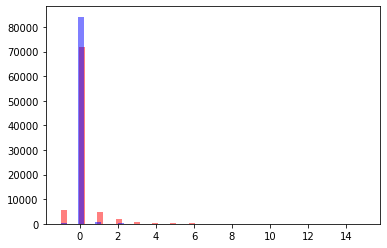





Feature  1 :


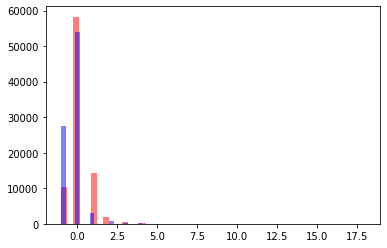





Feature  2 :


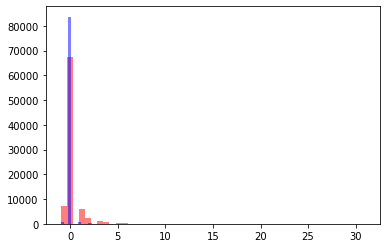





Feature  3 :


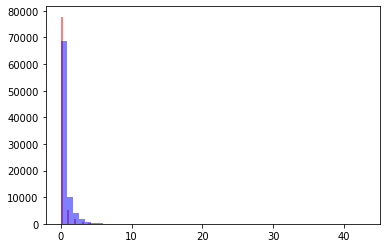





Feature  4 :


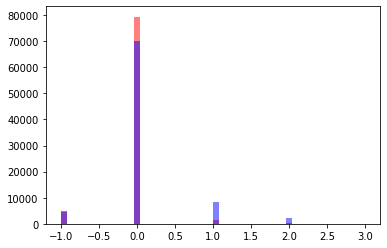





Feature  5 :


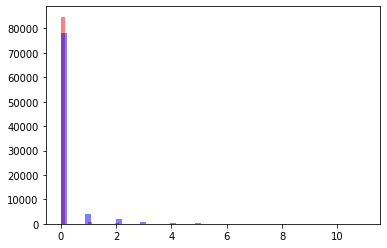





Feature  6 :


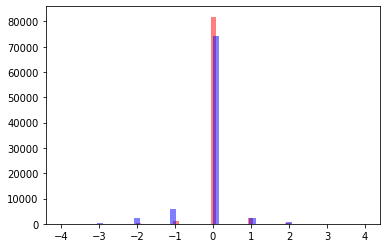





Feature  7 :


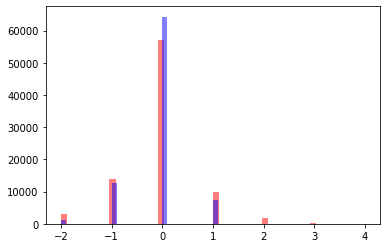





Feature  8 :


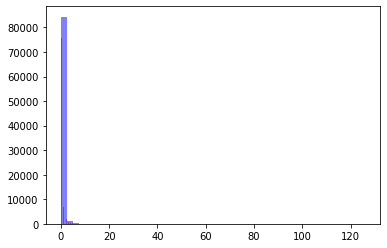





Feature  9 :


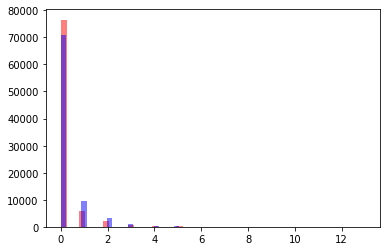





Feature  10 :


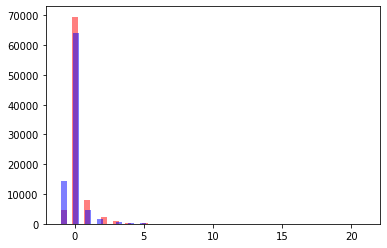





Feature  11 :


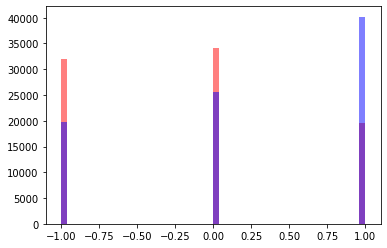





Feature  12 :


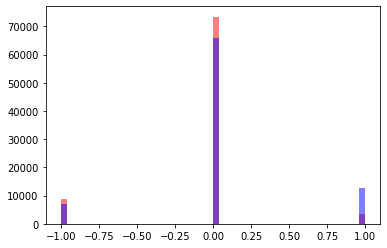





Feature  13 :


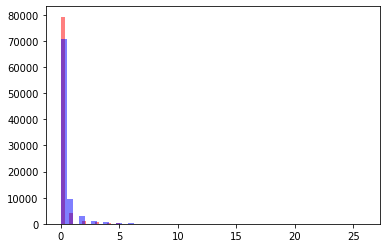





Feature  14 :


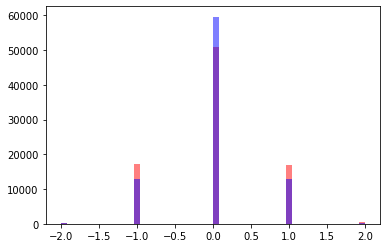





Feature  15 :


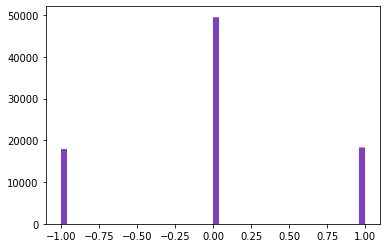





Feature  16 :


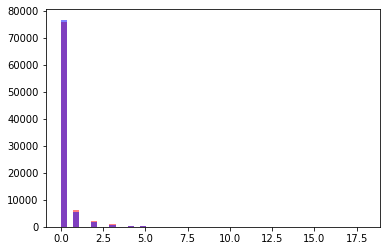





Feature  17 :


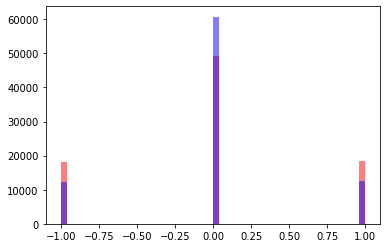





Feature  18 :


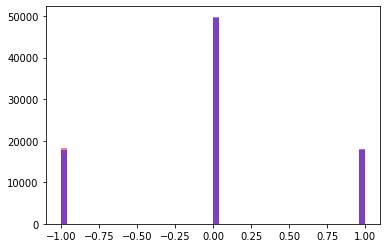





Feature  19 :


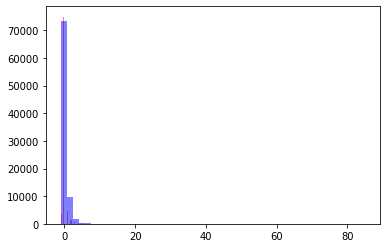





Feature  20 :


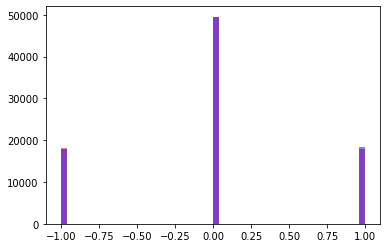





Feature  21 :


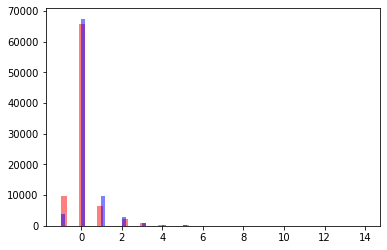





Feature  22 :


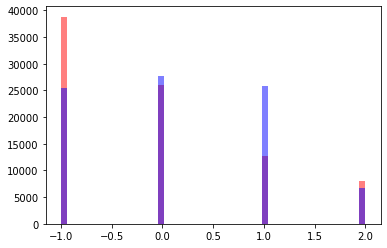





Feature  23 :


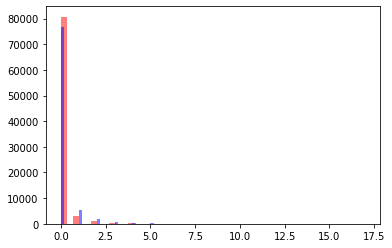





Feature  24 :


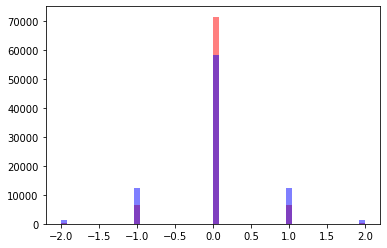





Feature  25 :


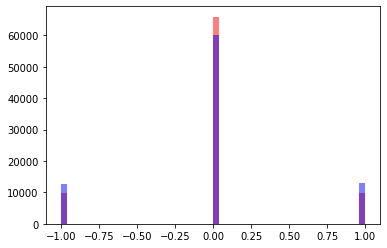





Feature  26 :


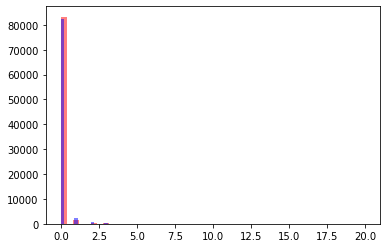





Feature  27 :


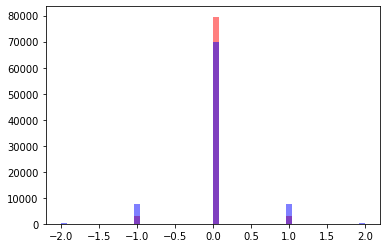





Feature  28 :


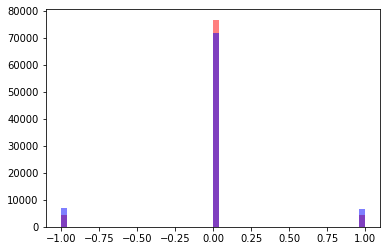





Feature  29 :


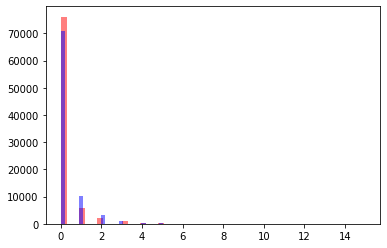

In [8]:
from matplotlib.colors import to_rgba
for i in range(0,30):
    print("Feature ", i,":")
    y1 = sanitized_x[:, i][y==1]
    y0 = sanitized_x[:, i][y==-1]
    sub_y0 = np.random.choice(y0, size=y1.shape[0], replace=False)
    plot_distr(sub_y0, y1)